# Introduction to Scikit-learn

Scikit-learn (package name: `sklearn`) is a Python-based toolkit for a wide variety of machine learning methods.  It supports both supervised learning methods such as classification and regression and unsupervised methods such as clustering and dimensionality reduction.  In addition, it provides much of the software infrastructure to enable the construction of machine learning pipelines, supporting activities such as train-test splitting, cross validation, and hyperparameter optimization.

In addition, the scikit-learn developer community has prepared rich documentation that not only describes the particular functions supported by the package, but also theoretical background on different machine learning algorithms and their relationship to one another.

In this exercise, we will mostly just begin to explore some of what scikit-learn has to offer, by importing and examining the package, reading some of the online documentation, and following along with some of the material provided in one of the scikit-learn tutorials.

Some of what we will consider here is derived from a tutorial in the scikit-learn documentation: [An introduction to machine learning with scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html).  You might like to open up that tutorial in another browser window to follow along as we proceed through this notebook.

### Step 1.

Let's begin by importing `sklearn`.  As noted, the project name is "scikit-learn," but that cannot serve as the name of a module because it contains a hyphen, which is invalid in Python variable names.  The package name ```sklearn``` is typically not shortened any further on import, unlike, say, numpy, pandas, seaborn, etc.

In the code cell below, import the package, and then execute the command ```help(sklearn)``` to get a brief introduction to the package.  You should see in the package description that sklearn in intended to work in the "tightly-knit world of scientific Python packages (numpy, scipy, matplotlib)."  This is part of what makes a successful ecosystem: higher-level packages implementating more specific functionality such as machine learning are able to rest on top of the infrastructure provided by other more general packages in the ecosystem.

You should also notice that `sklearn` is a Python module supporting "classical machine learning algorithms." Machine-learning algorithms have been developed and used for decades, although much of the recent excitement around the field revolves around newer "deep-learning" algorithms that use neural networks for their implementation.  While `sklearn` does provide some support for machine learning using neural networks, that is not its primary focus, hence the emphasis on "classical" algorithms.  There is no single algorithm or approach that works best for every problem, and one of the strengths of `sklearn` is that it supports the use and comparison of many different algorithms within one consistent and integrated framework.

In practice, because the `sklearn` package is large and contains many more components than one needs for any particular analysis, the entire package is typically not imported as we have done here.  Instead, particular submodules, or functions within those submodules, usually get imported for use within Python, as we will see below. 

In [1]:
import sklearn

### Step 2.

In an earlier video, we considered the machine learning problem of recognizing hand-written digits.  This is a classic problem that is often used in exercises and documentation, as well as by algorithm developers to benchmark their new algorithms alongside existing ones.  The sklearn package provides data and documentation for analyzing this type of problem.

The `sklearn` package includes some built-in datasets that can be imported.  One of these is a collection of low-resolution images (8 x 8 pixels) representing hand-written digits.  Let's import the dataset:

* First import the `datasets` submodule from the sklearn package (```from sklearn import datasets```)
* Next call the ```load_digits()``` function in the `datasets` module, and assign the result to the variable ```digits```.
* Using the built-in function <code>type</code>, print the type of the ```digits``` variable.

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
type(digits)

sklearn.utils.Bunch

### Step 3.

You should see that ```digits``` is an object of type 'sklearn.utils.Bunch', which is not something we have seen before, but it is basically a new type of container that is something like a Python dictionary.  (One of the ways it differs from a dictionary is that elements contained in the Bunch can be accessed using the dot operator ```.``` rather than the square-bracket indexing supported by dictionaries.  We'll see this feature below.)

Because a Bunch is similar to a dictionary, it can be queried to list its keys.  Print out the result of ```digits.keys()``` and examine the output.

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


### Step 4.

You should notice that ```digits``` contains multiple elements, one of which is ```images```, which we can access via the expression ```digits.images```, that is, using the dot operator to get the images out of the digits Bunch.  In the code cell below, print the types of the items ```images``` and ```target``` contained in ```digits```.

In [4]:
print(digits.images)
print(digits.target)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

### Step 5.

You should see that both ```images``` and ```target``` are numpy.ndarrays (which we usually just call "numpy arrays").  Since they are arrays, we can query their shape.  In the code cell below, print out the shape of both the ```images``` and ```target``` arrays.

In [5]:
x = digits.images
print(digits.images.shape)
print(digits.target.shape)

(1797, 8, 8)
(1797,)


### Step 6.

You should notice that ```images``` is a three-dimensional array of shape (1797, 8, 8) and that ```target``` is a one-dimensional array of shape (1797,).  Each array contains 1797 elements in it, since these are 1797 examples of hand-written digits in this dataset.  Let's have a look at the data in more detail.

In the code cell below:
* print the value of the first image in the array (```digits.images[0]```)
* print the value of the first target

In [6]:
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


### Step 7.

Because the images array has shape (1797, 8, 8), the first entry in that array (```digits.images[0]```) is an 8 x 8 subarray.  This array encodes the grayscale value of the first hand-written image in the dataset, i.e., each entry in the 8 x 8 array encodes the intensity (darkness) of the corresponding pixel.  From the output above, the value of ```digits.target[0]``` is reported to be ```0```.  This means that the first image in the dataset is an example of the digit 0.  It's a bit difficult to see that by staring at the numbers in the 8 x 8 image array, but maybe things will make more sense if we try to visualize the image.

Execute the code cell below, which uses the seaborn heatmap function to display the image.  Hopefully that looks something like a zero to you.

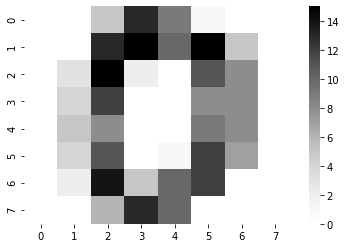

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(digits.images[0], cmap=plt.cm.Greys)

### Step 8.

The ```images``` and ```target``` entries are in registry with each other, e.g., ```target[0]``` indicates the true value of the data encoded in ```images[0]```, ```target[1]``` indicates the true value of the data encoded in ```images[1]```, etc.  There are 10 possible digits (0-9), but there are 1797 images of handwritten digits, so there are many different examples of each digit in the dataset.  The purpose of the classifier that we are going to build is to learn from these many examples, so that it can reliably identify a new handwritten digit that it has not been trained on.


In the code cell below, try out a few calls of your own using the ```sns.heatmap``` function to display some other images in the dataset.
* print the value of target number 314
* plot a heatmap of image number 314

If you want to peek at a few more, feel free to examine other digits in the dataset by selecting different image indexes.

6


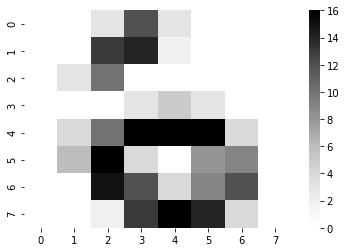

In [8]:
sns.heatmap(digits.images[314], cmap=plt.cm.Greys)
print(digits.target[314])

### Step 9.

The ```digits``` Bunch also contains an item called ```data```, which is also a numpy array.  In the code cell below, print out the shape of the data item.

In [9]:
print(digits.data.shape)

(1797, 64)


### Step 10.

You should see that ```digits.data``` has shape (1797, 64).  This reflects the fact that for each of the 1797 hand-written images in the dataset, the 8 x 8 image array has been "flattened" into a one-dimensional data array of length 64, by concatenating each of the 8 rows one after the other.  (Within numpy, an n-dimensional array can be flattened into a one-dimensional array using the function <code>np.ravel</code>.)  A flattening like this is convenient to be able to feed data into a machine learning algorithm, since we can use the same algorithm for datasets of different dimensions.  No information is lost by this flattening procedure, except for the fact that if we were to plot out the flattened array, we probably would not be able to recognize what digit is encoded. In the code cell below, make a simple line plot using ```plt.plot``` of the one-dimensional data in array <code>digits.data[0]</code> to see what the flattened version of the data looks like. 

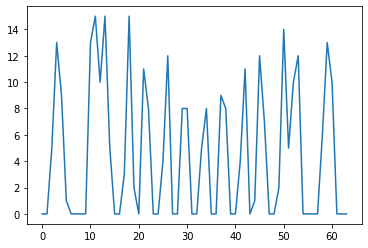

In [10]:
plot = plt.plot(digits.data[0])

### Step 11.

We've gone through multiple steps of interrogating the digits dataset, since this is typical in the process of developing a machine learning analysis, where one needs to understand the structure of the data and how the different data items relate to each other.  We're going to carry out a supervised learning classification of the data.

In this classification process, we are going to train a classifier on labeled examples, where the labels are the known values in the target array.  For example, the classifier will be instructed that the data in ```digits.data[0]``` corresponds to the digit 0, the data in ```digits.data[314]``` corresponds to the digit 6, etc.

The material in the sklearn tutorial on [Learning and predicting](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) describes this next phase of the process, which we will incorporate into the code cell below.

For now, just execute the code cell below and examine each step &mdash; in a later exercise we will go through the process of building a classifier in more detail:
* the first line imports the `svm` classifier from `sklearn`
* the second line creates an object of type SVC (Support Vector Classifier) and assigns it to the variable ```clf``` (short for classifier). Gamma and C are hyperparameters that can be specified by the user before training. They define the classification boundary between classified and missclassified data points. We have selected some sample values for this exercise but in practice there are heuristics and cross-validation procedures to identify good values.

* the third line fits (trains) the data in all of the images and targets except for the last (```digits.data[:-1]```, which stops one item short of the last entry)


In [11]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step 12.

Having fit the classifier on all but the last image, we can now try to predict the digit associated with the last image, by calling the ```predict``` method on our classifier ```clf```.  Execute the code cell below and examine the output.

In [12]:
clf.predict(digits.data[-1:])

array([8])

### Step 13.

This tells us that our classifier has predicted the last digit to be 8, based on everything it learned in training on the previous 1796 images.

In the code cell below, make a heatmap plot of the last image in the dataset.  Does it look like the number 8?  The sklearn tutorial notes: "As you can see, it is a challenging task: after all, the images are of poor resolution. Do you agree with the classifier?"

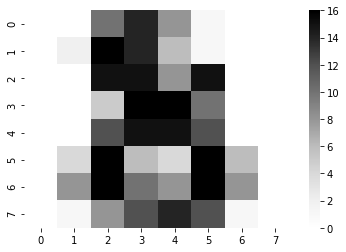

In [13]:
sns.heatmap(digits.images[1796], cmap=plt.cm.Greys)

# if you move several feet back, you can start to see that the image barely starts
# to take the shape of the number 8. I agree with the classifier in terms of the
# images being of a poor resolution

### Step 14.

The last digit in the dataset was *predicted* to be 8, based on the trained classifier. In the code cell below, write an expression that assigns to the variable <code>true_last_digit</code> the true value of the last digit in the dataset, by extracting the relevant value out of the <code>digits</code> object.

## Graded Cell

This cell is worth 50% of the grade for this assignment.

In [14]:
true_last_digit = clf.predict(digits.data[-1:])

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [15]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testDigit

try:
    print(testDigit(true_last_digit))    
except Exception as e:
    print("Error!\n" + str(e))

Correct!


### Step 15.

In the example above, we trained the classifier using all but one example, and then tried to predict the digit for that last remaining example.  That is just one of many possible workflows, using a particular split of training and testing data.  For example, we could instead train on all but the last 100 examples, and then predict the last 100 examples using that model.  

In the code cell below, copy the ```fit``` and ```predict``` functions found in Step 11 and Step 12 above, and modify them in order to fit the ```clf``` classifier on all but the last 100 examples, and then predict the digits for the last 100 examples. Save your result to the variable `predict_last_100`, and print out the value of that variable so that you can observe the set of predictions made for this test dataset.

## Graded Cell

This cell is worth 50% of the grade for this assignment.

In [16]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-100], digits.target[:-100])

clf.predict(digits.data[-100:])

predict_last_100 = clf.predict(digits.data[-100:])
print(predict_last_100)

[0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 8 7 5 3 4 6 6
 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3
 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]


## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [17]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testPredict100

try:
    print(testPredict100(digits, predict_last_100))    
except Exception as e:
    print("Error!\n" + str(e))

Correct!


This completes our introduction the scikit-learn.  Feel free to play around some more with the digits dataset.  The sklearn documentation provides a complete example of this classification problem that you might also like to examine: [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py).